In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [3]:
dataset = pd.read_csv("dataset/twitter-search-scraper.csv")
dataset

,avatar,fullname,id,images/0,images/1,images/2,images/3,images/4,isQuote,isReply,...,user/totalFollowing,user/totalLikes,user/totalTweets,user/url,user/userFullName,user/username,user/verified,user/website,username,verified
0,NaN,NaN,1826994226376401202,https://pbs.twimg.com/media/GVrI4CZa4AAHaM8.jpg,NaN,NaN,NaN,NaN,False,False,...,1414,38658,15914,https://twitter.com//lsangelina14,𝕷𝖔𝖚🐢🐺鍾ルイ || COMMS ON VGEN!!,@lsangelina14,False,vgen.co/LSANGELINA14,NaN,False
1,NaN,NaN,1827167972349374857,NaN,NaN,NaN,NaN,NaN,False,False,...,2943,9075,10800,https://twitter.com//lhsploopy,✩ g i a ₊˚✧,@lhsploopy,False,NaN,NaN,False
2,NaN,NaN,1826580538880385196,NaN,NaN,NaN,NaN,NaN,False,False,...,12482,72983,51387,https://twitter.com//JhonSitorus_18,Jhon Sitorus,@JhonSitorus_18,True,instagram.com/jhonsitorus8?i…,NaN,True
3,NaN,NaN,1827228761655255424,https://pbs.twimg.com/media/GVuetpYbIAAo8b3.jpg,NaN,NaN,NaN,NaN,False,False,...,389,163429,16094,https://twitter.com//_Jerung27,HiuDarat 🦈🇵🇸,@_Jerung27,False,linktr.ee/Jerung27,NaN,False
4,NaN,NaN,1826616259829793032,https://pbs.twimg.com/media/GVlxzURbgAYX9jV.jpg,NaN,NaN,NaN,NaN,False,False,...,69,602,1730,https://twitter.com//acertainmonkey,Nadir,@acertainmonkey,False,rant.xn--6ii/,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,NaN,NaN,1827004594590973970,NaN,NaN,NaN,NaN,NaN,True,False,...,299,31263,19722,https://twitter.com//itsquaileggs,️️ ️️,@itsquaileggs,True,NaN,NaN,True
467,NaN,NaN,1827232713335828739,https://pbs.twimg.com/media/GVuid9pbQAAALqk.jpg,NaN,NaN,NaN,NaN,False,False,...,192,2762,3354,https://twitter.com//Meivillexx,Mei ~ 🐰,@Meivillexx,False,NaN,NaN,False
468,NaN,NaN,1827241510775222546,NaN,NaN,NaN,NaN,NaN,False,True,...,6,26809,3432,https://twitter.com//Risa638390,Risa,@Risa638390,False,NaN,NaN,False
469,NaN,NaN,1827249587628994729,NaN,NaN,NaN,NaN,NaN,False,True,...,473,9180,4893,https://twitter.com//matchkkie,Alma🍉,@matchkkie,False,NaN,NaN,False


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 78 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   avatar                 96 non-null     object 
 1   fullname               96 non-null     object 
 2   id                     471 non-null    int64  
 3   images/0               216 non-null    object 
 4   images/1               50 non-null     object 
 5   images/2               21 non-null     object 
 6   images/3               7 non-null      object 
 7   images/4               1 non-null      object 
 8   isQuote                471 non-null    bool   
 9   isReply                471 non-null    bool   
 10  isRetweet              471 non-null    bool   
 11  likes                  471 non-null    int64  
 12  links/0                471 non-null    object 
 13  links/1                404 non-null    object 
 14  links/2                330 non-null    object 
 15  links/

## Exploratory Data Analysis

In [7]:
dataset['date']

0      2024-08-23
1      2024-08-24
2      2024-08-22
3      2024-08-24
4      2024-08-22
          ...    
466    2024-08-23
467    2024-08-24
468    2024-08-24
469    2024-08-24
470    2024-08-24
Name: date, Length: 471, dtype: object

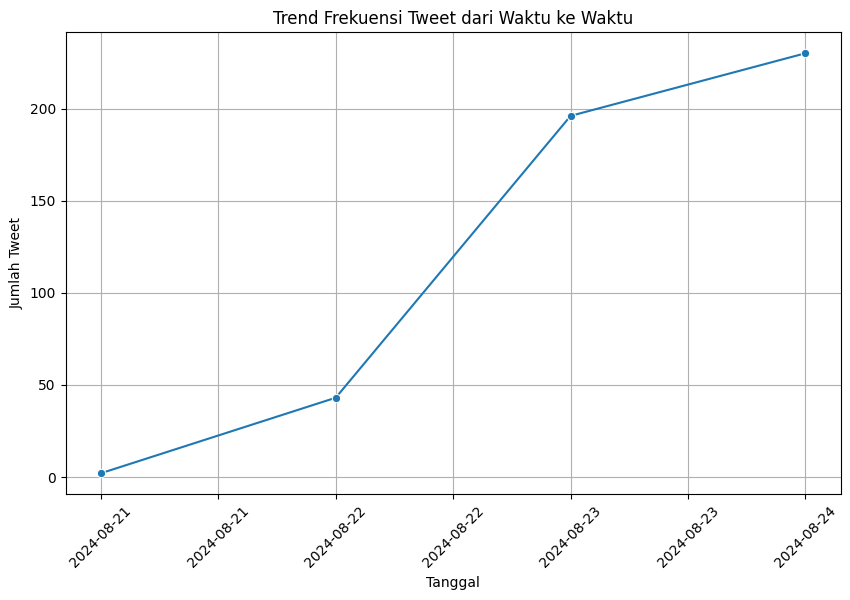

In [12]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])
dataset['date'] = dataset['timestamp'].dt.date

tweet_counts = dataset['date'].value_counts().sort_index()
tweet_counts_df = tweet_counts.reset_index()
tweet_counts_df.columns = ['date', 'tweet_count']

plt.figure(figsize=(10, 6))
sns.lineplot(data=tweet_counts_df, x='date', y='tweet_count', marker='o')
plt.gca().xaxis.set_major_formatter(
    plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.title('Trend Frekuensi Tweet dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Tweet')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [22]:
sia = SentimentIntensityAnalyzer()